In [3]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime
from IPython.core.display import display, HTML
import cv2
from PIL import Image
from pathlib import Path
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import ast

from sklearn.model_selection import train_test_split

# repeatable functions housed in the utils file and imported here

# us this if you're using Colab
sys.path.insert(1, './drive/MyDrive/OMSCS/CS7643-Final-Project')
from utils import *
from model_training_utils import train as training_loop
from model_training_utils import validate as validation_loop
from model_training_utils import hp_grid_search
from models import CNN, YOLO, VGG, SimpleVGG

In [4]:
net= CNN()

In [5]:
net.load_state_dict(torch.load("./models/Final_SimpleCNN_StateDict.pt", map_location=torch.device('cpu')), )
net.float()
net.eval()

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(10, 10), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (pool): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (linear1): Linear(in_features=10816, out_features=1000, bias=True)
  (linear2): Linear(in_features=1000, out_features=4, bias=True)
)

In [6]:
# for i in np.arange(1,37):
#     img_num=i
#     x= cv2.imread('./images/resized/{}.jpg'.format(img_num))
#     x= normalize(x)
#     x= torch.tensor(x)
#     x= torch.unsqueeze(x, dim=0)
#     x= x.float()
#     out= net(x)

In [97]:
img_num="19"

x= cv2.imread('./images/resized/{}.jpg'.format(img_num))
x= normalize(x)
x= torch.tensor(x)
x= torch.unsqueeze(x, dim=0)
x= x.float()
out= net(x)
print(out)

tensor([[192.2500, 181.3262, 187.5305, 188.5502]], grad_fn=<AddmmBackward>)


images/resized/19.jpg
actual
[132, 361, 137, 370, 5, 9]
predicted
[192.25003051757812, 181.3262481689453, 187.53053283691406, 188.55020141601562, -4.7194976806640625, 7.2239532470703125]


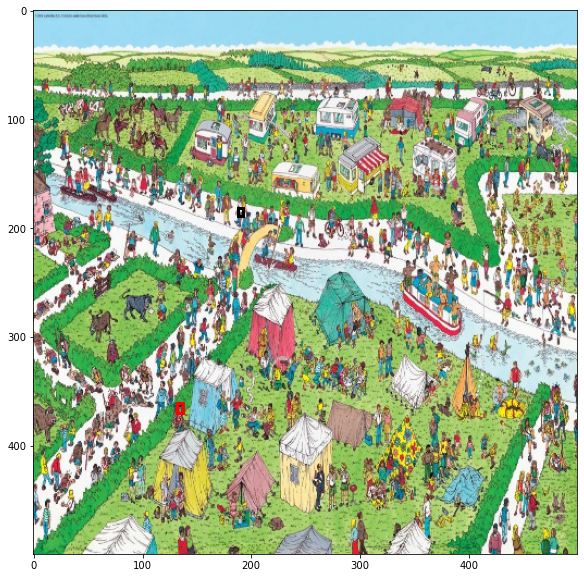

In [98]:
model_output= out
images_path= "images/resized/"
annotations_path= "./datasets/annotations_map_resized.csv"
df= pd.read_csv(annotations_path)

print(images_path+img_num+'.jpg')

_xmin=df[df['filename']==images_path+img_num+'.jpg']['xmin'].values[0]
_ymin=df[df['filename']==images_path+img_num+'.jpg']['ymin'].values[0]
_xmax=df[df['filename']==images_path+img_num+'.jpg']['xmax'].values[0]
_ymax=df[df['filename']==images_path+img_num+'.jpg']['ymax'].values[0]
_width= _xmax - _xmin
_height= _ymax - _ymin
_r= [_xmin, _ymin, _xmax, _ymax, _width, _height]
print('actual')
print(_r)

img = Image.open(images_path+img_num+'.jpg')
out= torch.squeeze(out)
xmin= out[0].item()
ymin= out[1].item()
xmax= out[2].item()
ymax= out[3].item()
width= xmax - xmin 
height= ymax - ymin 

r= [xmin, ymin, xmax, ymax, width, height]

print('predicted')
print(r)

# Create figure and axes
fig, ax = plt.subplots(figsize= (10,10))

# Display the image
ax.imshow(img)

ax.add_patch(patches.Rectangle((r[0], r[1]), r[4], r[5], linewidth=3, edgecolor='black', facecolor='none'))
ax.add_patch(patches.Rectangle((_r[0], _r[1]), _r[4], _r[5], linewidth=3, edgecolor='red', facecolor='none'))
plt.savefig('./images/final_predictions/image{0}.png'.format(img_num))
plt.show()